In [5]:
import pickle 
import pandas as pd
import numpy as np
#from plotnine import *
from hippie.parser.parser import *
%matplotlib inline
import numpy as np
from bhtsne import tsne

In [7]:
with open('aco_1511727150.4470987log.pkl', 'rb') as fp:
    df = pickle.load(fp)
df.head()

,Name,Cost,Route
0,1.tsp,28708,"[5, 139, 63, 88, 33, 58, 48, 99, 73, 124, 137,..."
1,2.tsp,23309,"[35, 16, 135, 26, 40, 19, 3, 87, 89, 140, 122,..."
2,3.tsp,21085,"[123, 84, 134, 28, 35, 71, 30, 15, 127, 130, 9..."


In [8]:
df.dtypes

Name     object
Cost      int64
Route    object
dtype: object

In [40]:
# http://www.blog.pyoung.net/2013/07/26/visualizing-the-traveling-salesman-problem-using-matplotlib-in-python/
# slightly modified

import matplotlib.pyplot as plt

def plotTSP(path, points, num_iters=1, color = 'g', paths=[]):

    """
    path: List of lists with the different orders in which the nodes are visited
    points: coordinates for the different nodes
    num_iters: number of paths that are in the path list
    
    """

    # Unpack the primary TSP path and transform it into a list of ordered 
    # coordinates

    x = []; y = []
    for i in paths[0]:
        x.append(points[i][0])
        y.append(points[i][1])
    
    plt.plot(x, y, 'co')

    # Set a scale for the arrow heads (there should be a reasonable default for this, WTF?)
    a_scale = float(max(x))/float(100)

    # Draw the older paths, if provided
    if num_iters > 1:

        for i in range(1, num_iters):

            # Transform the old paths into a list of coordinates
            xi = []; yi = [];
            for j in paths[i]:
                xi.append(points[j][0])
                yi.append(points[j][1])

            plt.arrow(xi[-1], yi[-1], (xi[0] - xi[-1]), (yi[0] - yi[-1]), 
                    head_width = a_scale, color = 'r', 
                    length_includes_head = True, ls = 'dashed',
                    width = 0.001/float(num_iters))
            for i in range(0, len(x) - 1):
                plt.arrow(xi[i], yi[i], (xi[i+1] - xi[i]), (yi[i+1] - yi[i]),
                        head_width = a_scale, color = 'r', length_includes_head = True,
                        ls = 'dashed', width = 0.001/float(num_iters))

    # Draw the primary path for the TSP problem
    plt.arrow(x[-1], y[-1], (x[0] - x[-1]), (y[0] - y[-1]), head_width = a_scale, 
            color =color, length_includes_head=True)
    for i in range(0,len(x)-1):
        plt.arrow(x[i], y[i], (x[i+1] - x[i]), (y[i+1] - y[i]), head_width = a_scale,
                color = color, length_includes_head = True)

    #Set axis too slitghtly larger than the set of x and y
    #plt.xlim(0, max(x)*1.1)
    #plt.ylim(0, max(y)*1.1)
    plt.show()

Name: 1.tsp
Cost: 28708


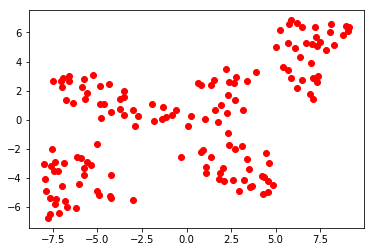

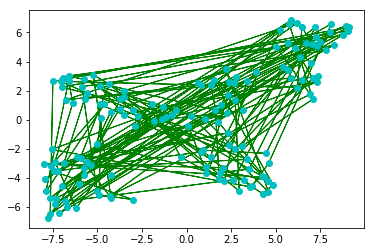

In [42]:
# distance matrix to 2d points
distance_matrix = parse_to_matrix("problems/travelling_salesman/data/1.tsp", dtype= np.float64)
points_tsne = tsne(distance_matrix)

route = df['Route'][0]
print("Name: " + str(df['Name'][0]))
print("Cost: " + str(df['Cost'][0]))
#print("Route: " + str(df['Route'][0]))
#print("Points: " + str(points_tsne))
#print("Distance Matrix: " + str(distance_matrix))

plt.plot(*zip(*points_tsne),'ro')
plt.show()

plotTSP(route, points_tsne, 1, color='g', paths=[df['Route'][0]])

Name: 2.tsp
Cost: 23309


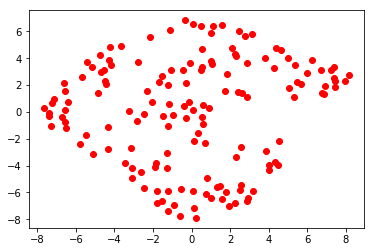

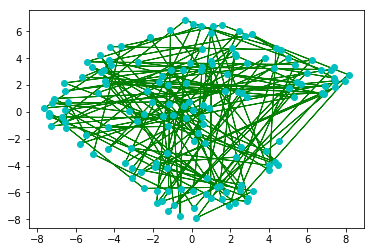

In [43]:
# distance matrix to 2d points
distance_matrix = parse_to_matrix("problems/travelling_salesman/data/2.tsp", dtype= np.float64)
points_tsne = tsne(distance_matrix)

route = df['Route'][1]
print("Name: " + str(df['Name'][1]))
print("Cost: " + str(df['Cost'][1]))
#print("Route: " + str(df['Route'][0]))
#print("Points: " + str(points_tsne))
#print("Distance Matrix: " + str(distance_matrix))

plt.plot(*zip(*points_tsne),'ro')
plt.show()

plotTSP(route, points_tsne, 1, color='g', paths=[df['Route'][1]])

Name: 1.tsp
Cost: 28708


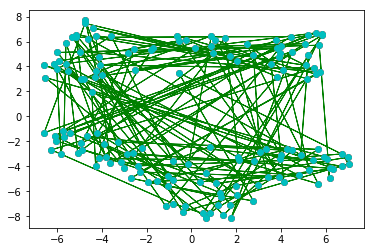

In [27]:
# distance matrix to 2d points
distance_matrix = parse_to_matrix("problems/travelling_salesman/data/3.tsp", dtype= np.float64)
points_tsne = tsne(distance_matrix)

route = df['Route'][2]
print("Name: " + str(df['Name'][2]))
print("Cost: " + str(df['Cost'][2]))
#print("Route: " + str(df['Route'][0]))
#print("Points: " + str(points_tsne))
#print("Distance Matrix: " + str(distance_matrix))

plt.plot(*zip(*points_tsne),'ro')
plt.show()

plotTSP(route, points_tsne, 1, color='g', paths=[df['Route'][2]])

In [ ]:
distance_matrix = parse_to_matrix("problems/travelling_salesman/data/2.tsp", dtype= np.float64)
points_tsne = tsne(distance_matrix)

route = df['Route'][1]
print("Name: " + str(df['Name'][1]))
print("Cost: " + str(df['Cost'][1]))
plotTSP(route, points_tsne, 1, color='r')

In [ ]:
distance_matrix = parse_to_matrix("problems/travelling_salesman/data/3.tsp", dtype= np.float64)
points_tsne = tsne(distance_matrix)

route = df['Route'][2]
print("Name: " + str(df['Name'][2]))
print("Cost: " + str(df['Cost'][2]))
plotTSP(route, points_tsne, 1, color='b')